#### Etape 4.3 : Dashboard executif
Creer un dashboard multi-panneaux (2x3) synthetisant les resultats :

- Panel 1 : Evolution de la consommation totale (6 derniers mois)
- Panel 2 : Top 10 batiments les plus energivores (bar horizontal)
- Panel 3 : Repartition des couts par type d'energie (pie chart)
- Panel 4 : Consommation moyenne par classe DPE avec ecart-type
- Panel 5 : Carte de chaleur par commune
- Panel 6 : Economies potentielles par amelioration du DPE

**Livrables** :
- Notebook `11_dashboard_executif.ipynb`
- Figure dashboard `output/figures/dashboard_energie.png`

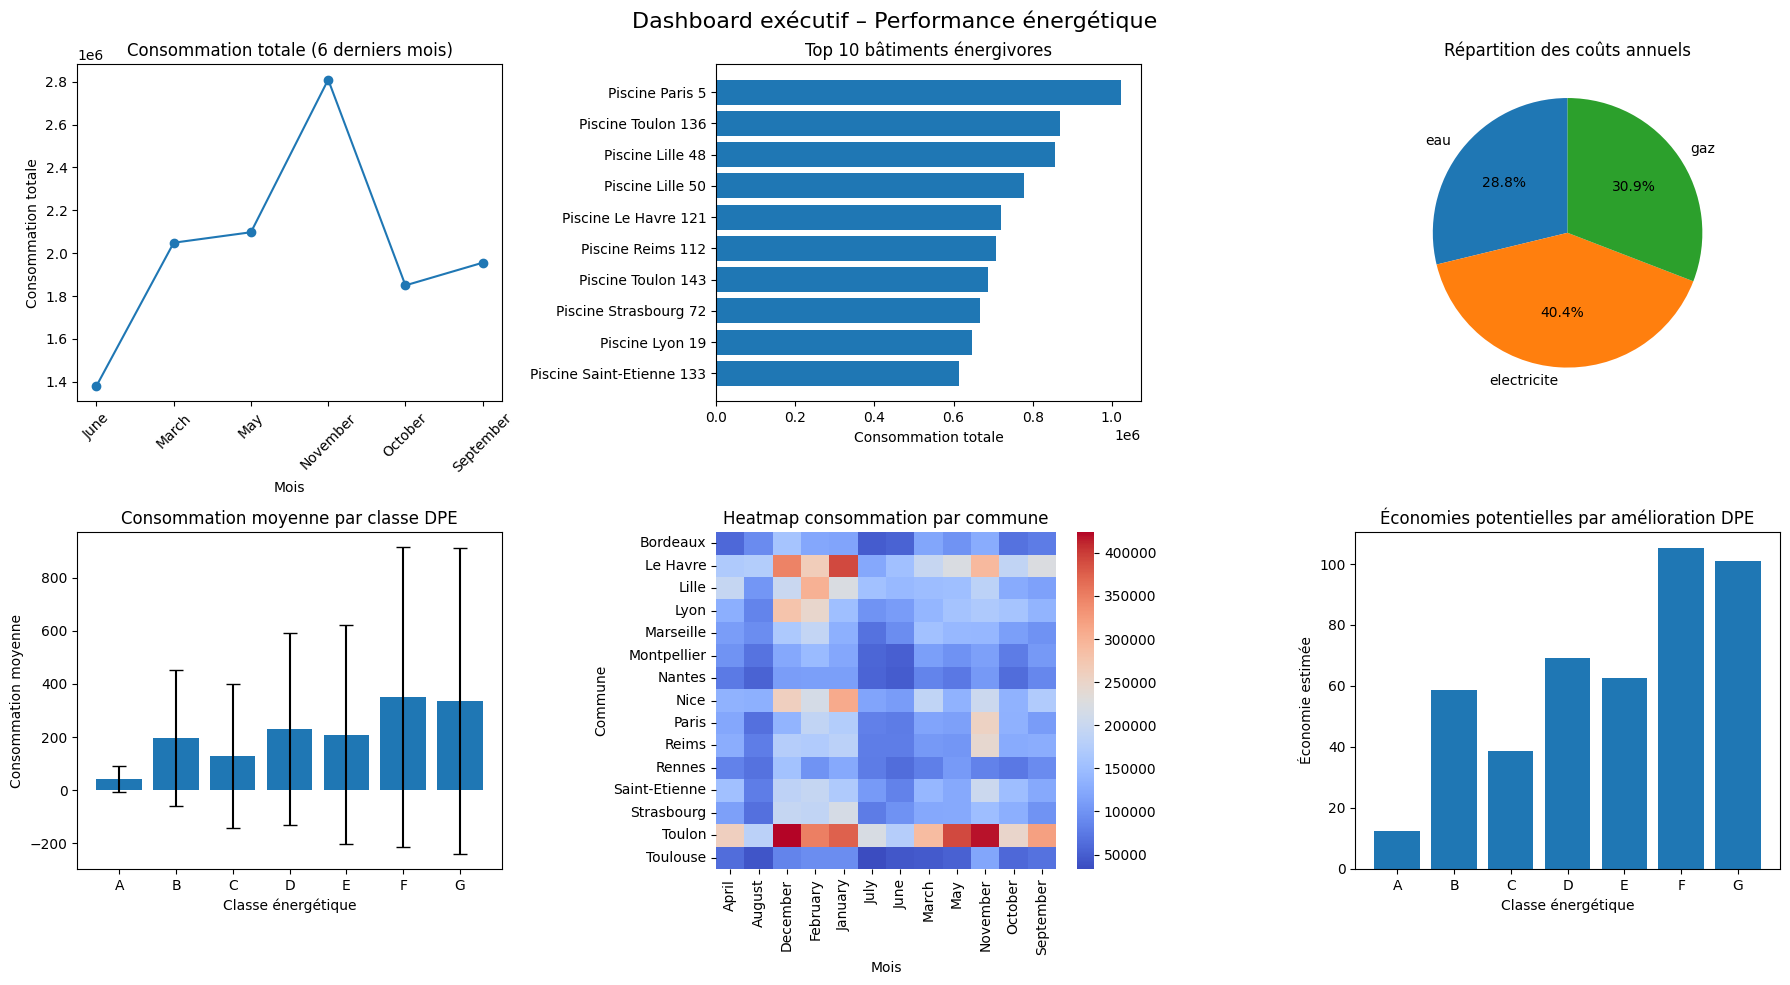

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../output/consommations_enrichies.csv")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Dashboard exécutif – Performance énergétique", fontsize=16)

# 1. Evolution de la consommation totale (6 derniers mois)
df_month = df.groupby('mois')['consommation'].sum().reset_index()
df_month = df_month.sort_values('mois').tail(6)

axes[0, 0].plot(df_month['mois'], df_month['consommation'], marker='o')
axes[0, 0].set_title("Consommation totale (6 derniers mois)")
axes[0, 0].set_xlabel("Mois")
axes[0, 0].set_ylabel("Consommation totale")
axes[0, 0].tick_params(axis='x', rotation=45)


# 2. Top 10 batiments les plus energivores (bar horizontal)
df_top = (
    df.groupby('nom')['consommation']
    .sum()
    .nlargest(10)
    .sort_values()
)

axes[0, 1].barh(df_top.index, df_top.values)
axes[0, 1].set_title("Top 10 bâtiments énergivores")
axes[0, 1].set_xlabel("Consommation totale")


# 3. Repartition des couts par type d'energie (pie chart)
df_cost = df.groupby('type_energie')['cout_annuel'].sum()

axes[0, 2].pie(
    df_cost.values,
    labels=df_cost.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[0, 2].set_title("Répartition des coûts annuels")


# 4.  Consommation moyenne par classe DPE avec ecart-type
df_dpe = df.groupby('classe_energetique')['consommation'].agg(['mean', 'std']).reset_index()

axes[1, 0].bar(
    df_dpe['classe_energetique'],
    df_dpe['mean'],
    yerr=df_dpe['std'],
    capsize=5
)
axes[1, 0].set_title("Consommation moyenne par classe DPE")
axes[1, 0].set_xlabel("Classe énergétique")
axes[1, 0].set_ylabel("Consommation moyenne")


# 5. Carte de chaleur par commune
df_heat = (
    df.groupby(['commune', 'mois'])['consommation']
    .sum()
    .reset_index()
    .pivot(index='commune', columns='mois', values='consommation')
)

sns.heatmap(df_heat, ax=axes[1, 1], cmap="coolwarm")
axes[1, 1].set_title("Heatmap consommation par commune")
axes[1, 1].set_xlabel("Mois")
axes[1, 1].set_ylabel("Commune")


# 6. Economies potentielles par amelioration du DPE
df_savings = (
    df.groupby('classe_energetique')['consommation']
    .mean()
    .reset_index()
)

df_savings['economie_potentielle'] = df_savings['consommation'] * 0.3

axes[1, 2].bar(
    df_savings['classe_energetique'],
    df_savings['economie_potentielle']
)
axes[1, 2].set_title("Économies potentielles par amélioration DPE")
axes[1, 2].set_xlabel("Classe énergétique")
axes[1, 2].set_ylabel("Économie estimée")
plt.tight_layout(rect=[0, 0, 1, 1])


output_path = f"../output/figures/dashboard_energie.png"
plt.savefig(output_path, dpi=300)
plt.show()

